In [47]:
# Dependencies
import os
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create path to file
path_national = ('../Clean_2011_2016/medicare_national_costs2011_2016.csv')
path_state = ('../Clean_2011_2016/medicare_state_costs2011_2016.csv')
path_ethnicity = ('../Clean_2011_2016/medicare_ethnicity_breakdown2011_2016.csv')
path_expenditures = ('../Clean_2011_2016/total_national_expenditures2011-216.csv')
path_historical_summary = ('../Clean_2011_2016/healthcare_historical_data_summary2011_2016.csv')
path_historical_percents = ('../Clean_2011_2016/healthcare_percent_change_data_2011_2016.csv')
path_median_income = ('../Cleaned_Data/median_income.csv')
path_obesity = ('../Clean_2011_2016/overall_clean_obesity_data.csv')
path_obesity_us = ('../Clean_2011_2016/us_obesity_total.csv')
path_cpc = ('../Clean_2011_2016/medicare_costpercapita_2011_2016.csv')

In [54]:
# Reformat national df
medicare_national = pd.read_csv(path_national,skipinitialspace=True)
medicare_national = medicare_national.set_index('Unnamed: 0')
del medicare_national.index.name
pd.options.display.float_format = '${:,.2f}'.format
medicare_national.T

,FFS Beneficiaries,Total Actual Costs
2011,"$33,243,630.00","$323,694,090,197.63"
2012,"$33,524,593.00","$325,627,793,988.71"
2013,"$33,641,801.00","$326,410,120,897.28"
2014,"$33,462,982.00","$327,653,738,646.21"
2015,"$33,551,417.00","$335,133,914,012.21"
2016,"$33,991,540.00","$343,377,861,003.88"


In [65]:
# Making years integers
nattys = mc_national_cost.reset_index(drop = False)
nattys['index'] = nattys['index'].astype(int)
natty = nattys.set_index('index')
del natty.index.name

,FFS Beneficiaries,Total Actual Costs
2011,"$33,243,630.00","$323,694,090,197.63"
2012,"$33,524,593.00","$325,627,793,988.71"
2013,"$33,641,801.00","$326,410,120,897.28"
2014,"$33,462,982.00","$327,653,738,646.21"
2015,"$33,551,417.00","$335,133,914,012.21"
2016,"$33,991,540.00","$343,377,861,003.88"


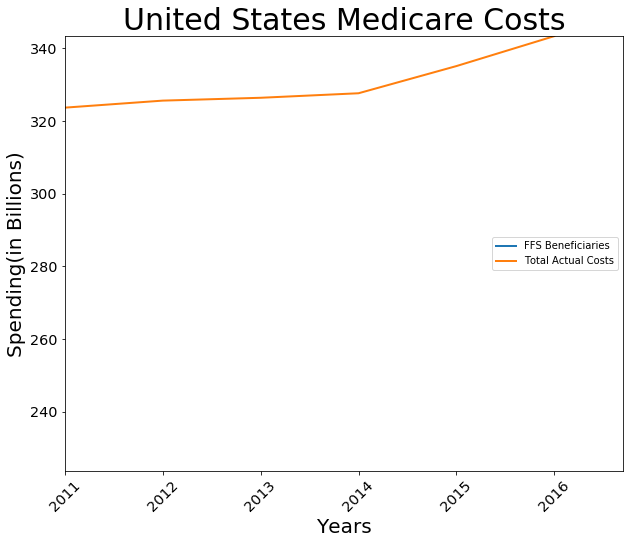

In [71]:
# Reformat
mc_national_cost = medicare_national.T
mc_national = natty.div(1000000000)

# Creating variables for my limits
nat_low = mc_national['Total Actual Costs'].min() -100
nat_high = mc_national['Total Actual Costs'].max()
nat_xlow = mc_national.index.min()
nat_xhigh = mc_national.index.max()+0.7
nat_x_axis = np.arange (nat_xlow, nat_xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (10, 8))
plt.plot(mc_national, linewidth = 2)
plt.legend(labels = mc_national, loc="right",  
           prop={'size': 10}, fancybox = True)
plt.title('United States Medicare Costs', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Spending(in Billions)', fontdict = {'fontsize' : 20})
plt.xticks(nat_x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (nat_xlow, nat_xhigh)
plt.ylim (nat_low, nat_high)
plt.show()

In [10]:
# Reformat states df
medicare_state = pd.read_csv(path_state,skipinitialspace=True)
medicare_states = medicare_state.drop(columns = {'Unnamed: 0'})
medicare_states = medicare_states.set_index('State')
del medicare_states.index.name
medicare_states.head()

,Beneficiaries 2011,Total Actual Costs 2011,Beneficiaries 2012,Total Actual Costs 2012,Beneficiaries 2013,Total Actual Costs 2013,Beneficiaries 2014,Total Actual Costs 2014,Beneficiaries 2015,Total Actual Costs 2015,Beneficiaries 2016,Total Actual Costs 2016
CA,2671637,2.866239e+10,2742188,2.942203e+10,2766683.0,2.992150e+10,2718792,2.942228e+10,2755868,3.074443e+10,2815420,3.242581e+10
TX,2321444,2.500245e+10,2310636,2.478010e+10,2230001.0,2.387679e+10,2235759,2.429354e+10,2190149,2.405938e+10,2223092,2.470190e+10
FL,2229556,2.472055e+10,2217181,2.449029e+10,2213241.0,2.429859e+10,2208280,2.428310e+10,2215360,2.451492e+10,2243115,2.477965e+10
NY,1841408,2.057967e+10,1837662,2.037430e+10,1825003.0,2.024889e+10,1801175,2.025600e+10,1788662,2.055105e+10,1803929,2.127581e+10
IL,1587999,1.625919e+10,1602266,1.629935e+10,1620399.0,1.636970e+10,1474203,1.490641e+10,1456942,1.488050e+10,1472941,1.533055e+10


In [23]:
medicare_state_costs = medicare_states.iloc[:, [1, 3, 5, 7, 9, 11]]
medicare_state_costs = medicare_state_costs.rename(columns = {'Total Actual Costs 2011' : 2011, 
                                'Total Actual Costs 2012': 2012, 'Total Actual Costs 2013': 2013,
                                'Total Actual Costs 2014': 2014, 'Total Actual Costs 2015': 2015,
                                'Total Actual Costs 2016': 2016})

# Reformating df
pd.options.display.float_format = '${:,.2f}'.format
medicare_state_costs.head()

,2011,2012,2013,2014,2015,2016
CA,"$28,662,389,980.08","$29,422,028,455.97","$29,921,500,970.50","$29,422,283,914.61","$30,744,427,238.10","$32,425,811,718.29"
TX,"$25,002,454,108.76","$24,780,099,131.64","$23,876,791,994.48","$24,293,540,727.72","$24,059,376,495.38","$24,701,901,753.48"
FL,"$24,720,553,969.45","$24,490,291,516.95","$24,298,591,933.81","$24,283,097,090.70","$24,514,917,389.99","$24,779,654,901.86"
NY,"$20,579,671,640.38","$20,374,299,062.07","$20,248,893,895.74","$20,255,995,176.58","$20,551,048,090.61","$21,275,813,539.78"
IL,"$16,259,185,273.50","$16,299,349,954.63","$16,369,700,739.41","$14,906,406,775.61","$14,880,495,079.06","$15,330,549,694.22"


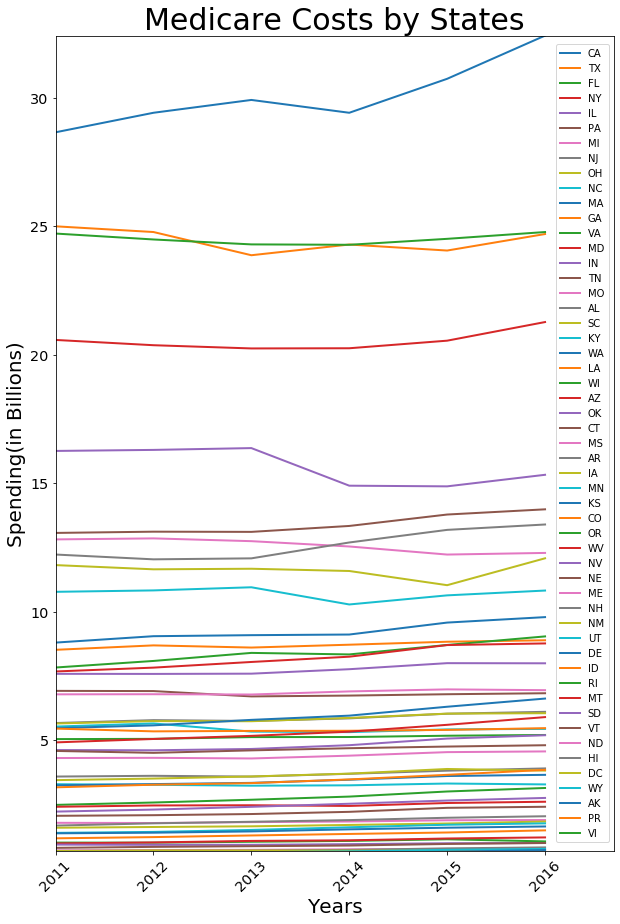

In [51]:
# Rotate df
mcs_state_cost = medicare_state_costs.T
mc_state_cost = mcs_state_cost.div(1000000000)

# Creating variables for my limits
mcs_low = mc_state_cost['DC'].min()
mcs_high = mc_state_cost['CA'].max()
mcs_xlow = mc_state_cost.index.min()
mcs_xhigh = mc_state_cost.index.max()+0.7
mcs_x_axis = np.arange (mcs_xlow, mcs_xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (10, 15))
plt.plot(mc_state_cost, linewidth = 2)
plt.legend(labels = mc_state_cost, loc="right",  
           prop={'size': 10}, fancybox = True)
plt.title('Medicare Costs by States', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Spending(in Billions)', fontdict = {'fontsize' : 20})
plt.xticks(mcs_x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (mcs_xlow, mcs_xhigh)
plt.ylim (mcs_low, mcs_high)
plt.show()

In [4]:
obesity_df = pd.read_csv(path_obesity,skipinitialspace=True)
obesity_df

,State,Year,Percent Adults,Sample_Size,Obese_Count,GeoLocation
0,AL,2011,32.0,7304.0,2337.28,"(32.84057112200048, -86.63186076199969)"
1,OR,2011,26.7,5959.0,1591.05,"(44.56744942400047, -120.15503132599969)"
2,FL,2011,26.6,11770.0,3130.82,"(28.932040377000476, -81.92896053899966)"
3,OK,2011,31.1,8159.0,2537.45,"(35.47203135600046, -97.52107021399968)"
4,OH,2011,29.6,9339.0,2764.34,"(40.06021014100048, -82.40426005599966)"
...,...,...,...,...,...,...
315,HI,2016,23.8,7659.0,1822.84,"(21.304850435000446, -157.85774940299973)"
316,ID,2016,27.4,4880.0,1337.12,"(43.682630005000476, -114.3637300419997)"
317,IL,2016,31.6,4518.0,1427.69,"(40.48501028300046, -88.99771017799969)"
318,IA,2016,32.0,6645.0,2126.40,"(42.46940091300047, -93.81649055599968)"


In [5]:
obesity_total_df = pd.read_csv(path_obesity_us,skipinitialspace=True)
obesity_total = obesity_total_df.drop(columns ={'Unnamed: 0'})
obesity_total

,Year,Percent Adults,Sample_Size,Obese_Count
0,2011,27.4,470700.0,128971.80
1,2012,27.7,442230.0,122497.71
2,2013,28.3,457487.0,129468.82
3,2014,28.9,425875.0,123077.87
4,2015,28.9,398316.0,115113.32
5,2016,29.6,438479.0,129789.78


In [151]:
state_obesity = obesity_df[['State', 'Year', 'Percent Adults']]

# Obese Count broken into year by state (2011)
state_obesity_11 = state_obesity.loc[(state_obesity['Year']== 2011),:]
state_obesity_011 = state_obesity_11.drop(columns={'Year'})
state_obesity_2011 = state_obesity_011.rename(columns= {'Percent Adults':2011})

# Obese Count broken into year by state (2012)
state_obesity_12 = state_obesity.loc[(state_obesity['Year']== 2012),:]
state_obesity_012 = state_obesity_12.drop(columns={'Year'})
state_obesity_2012 = state_obesity_012.rename(columns= {'Percent Adults':2012})

# Obese Count broken into year by state (2013)
state_obesity_13 = state_obesity.loc[(state_obesity['Year']== 2013),:]
state_obesity_013 = state_obesity_13.drop(columns={'Year'})
state_obesity_2013 = state_obesity_013.rename(columns= {'Percent Adults':2013})

# Obese Count broken into year by state (2014)
state_obesity_14 = state_obesity.loc[(state_obesity['Year']== 2014),:]
state_obesity_014 = state_obesity_14.drop(columns={'Year'})
state_obesity_2014 = state_obesity_014.rename(columns= {'Percent Adults':2014})

# Obese Count broken into year by state (2015)
state_obesity_15 = state_obesity.loc[(state_obesity['Year']== 2015),:]
state_obesity_015 = state_obesity_12.drop(columns={'Year'})
state_obesity_2015 = state_obesity_012.rename(columns= {'Percent Adults':2015})

# Obese Count broken into year by state (2016)
state_obesity_16 = state_obesity.loc[(state_obesity['Year']== 2016),:]
state_obesity_016 = state_obesity_16.drop(columns={'Year'})
state_obesity_2016 = state_obesity_016.rename(columns= {'Percent Adults':2016})
state_obesity_2016.head()

,State,2016
265,OK,32.8
266,OH,31.5
267,ND,31.9
268,NC,31.8
269,NV,25.8


In [175]:
state_obese_count = state_obesity_2011.merge(state_obesity_2012,on='State').merge(
        state_obesity_2013,on='State').merge(state_obesity_2014,on='State').merge(
        state_obesity_2015,on='State').merge(state_obesity_2016,on='State')

state_obese_perc = state_obese_count.set_index('State')
del state_obese_perc.index.name
state_obese_perc = state_obese_perc.sort_values(by=[2016], ascending = False)
state_obese_percentage1 = state_obese_perc.T
state_obese_percentage2 = state_obese_percentage1.reset_index(drop = False)
state_obese_percentage2['index'] = state_obese_percentage2['index'].astype(int)
state_obese_percentage = state_obese_percentage2.set_index('index')
del state_obese_percentage.index.name
state_obese_percentage.T.head()

,2011,2012,2013,2014,2015,2016
WV,32.4,33.8,35.1,35.7,33.8,37.7
MS,34.9,34.6,35.1,35.5,34.6,37.3
AL,32.0,33.0,32.4,33.5,33.0,35.7
AR,30.9,34.5,34.6,35.9,34.5,35.7
LA,33.4,34.7,33.1,34.9,34.7,35.5


In [45]:
# Reformat national df
median_income_df = pd.read_csv(path_median_income,skipinitialspace=True)
median_income_data = median_income_df.set_index('Unnamed: 0')
del median_income_data.index.name

median_income_graph = median_income_data.iloc[27:33,:]
median_income_graph

,Median Income
2011,50054
2012,51017
2013,53585
2014,53657
2015,56516
2016,59039


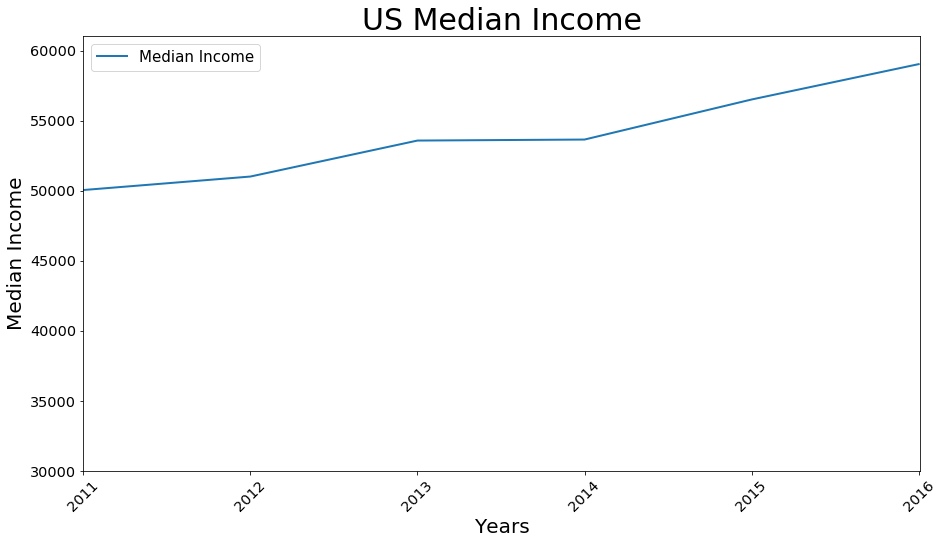

In [178]:
# Creating variables for my limits
low = 30000
high = median_income_graph['Median Income'].max() +2000
xlow = median_income_graph.index.min()
xhigh = median_income_graph.index.max()+.01
x_axis = np.arange (xlow, xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (15, 8))
plt.plot(median_income_graph, linewidth = 2)
plt.legend(labels = median_income_graph, loc="best",  
           prop={'size': 15}, fancybox = True)
plt.title('US Median Income', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Median Income', fontdict = {'fontsize' : 20})
plt.xticks(x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (xlow, xhigh)
plt.ylim (low, high)
plt.savefig('../Images/Median_Income_2011')
plt.show()

In [95]:
cost_per_capita_data = pd.read_csv(path_cpc,skipinitialspace=True)
cost_per_capita_df = cost_per_capita_data.set_index('Cost per Capita')
cpc_sort_a = cost_per_capita_df.sort_values(by = ['2016'])
cpc_sort_d = cost_per_capita_df.sort_values(by = ['2016'], ascending = False)
cpc_most = cpc_sort_d.head()
cpc_least = cpc_sort_a.head()
cpc_rangeT = cpc_sort_d.iloc[[0,1,2,3,25,26,47,48,49,50,], :]

del cpc_rangeT.index.name
cpc_range = cpc_rangeT.T
cpc_range

,NJ,DC,NY,CT,KY,NE,ID,NM,MT,HI
2011,11427.77,11824.84,11176.05,10911.93,8926.59,8580.16,7387.41,7437.70,6927.58,6892.09
2012,11286.61,12009.94,11087.08,10872.84,8916.76,8628.03,7558.60,7485.62,7044.51,7031.56
2013,11247.35,11729.49,11095.27,11150.62,8929.28,8613.18,7682.17,7596.39,7196.09,7136.04
2014,11476.91,11639.70,11245.99,11315.89,8914.39,8756.08,7871.14,7785.04,7276.29,7279.20
2015,11707.10,11717.40,11489.62,11531.02,9127.09,9161.49,8013.49,7902.88,7624.56,7613.80
2016,11907.03,11878.20,11794.15,11641.71,9199.04,9157.54,8082.01,8055.61,7799.74,7765.65


In [96]:
range_cpc1 = cpc_range.reset_index(drop = False)
range_cpc1['index'] = range_cpc1['index'].astype(int)
range_cpc = range_cpc1.set_index('index')
del range_cpc.index.name

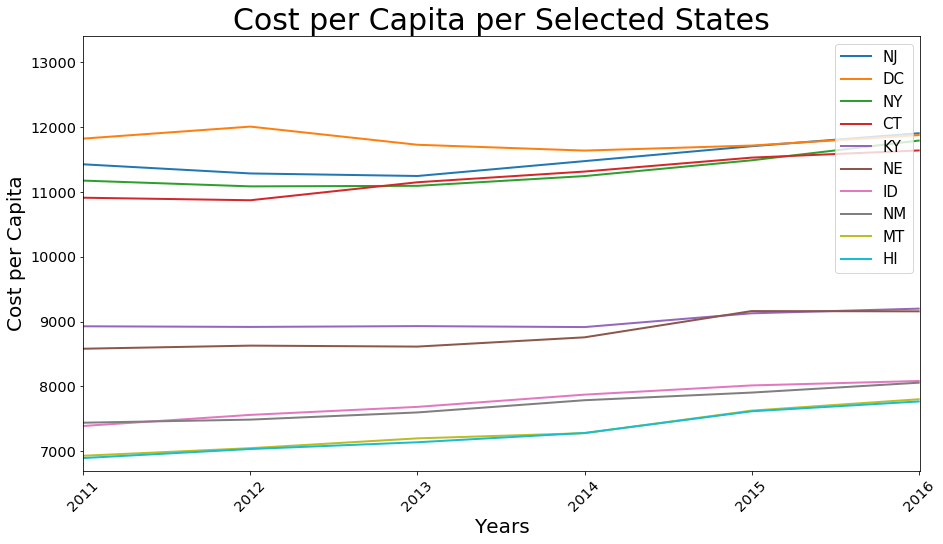

In [107]:
# Creating variables for my limits
low = range_cpc['HI'].min() - 200
high = range_cpc['NJ'].max() + 1500
xlow = range_cpc.index.min()
xhigh = range_cpc.index.max()+0.01
x_axis = np.arange (xlow, xhigh, 1)

# Creating and customizing a line graph
plt.figure(figsize = (15, 8))
plt.plot(range_cpc, linewidth = 2)
plt.legend(labels = range_cpc, loc="best",  
           prop={'size': 15}, fancybox = True)
plt.title('Cost per Capita per Selected States', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Cost per Capita', fontdict = {'fontsize' : 20})
plt.xticks(x_axis, fontsize = 'x-large', rotation = 45)
plt.yticks(fontsize = 'x-large')
plt.xlim (xlow, xhigh)
plt.ylim (low, high)
plt.savefig('../Images/cost_per_capita_2011')
plt.show()

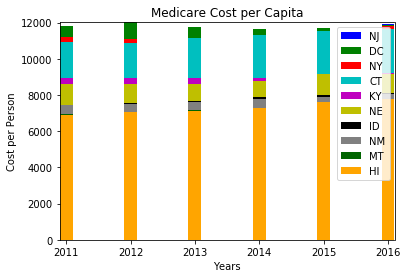

In [119]:
ax = plt.subplot(111)
ax.bar(x_axis, range_cpc['NJ'], width=0.2, color='b', align='center')
ax.bar(x_axis, range_cpc['DC'], width=0.2, color='g', align='center')
ax.bar(x_axis, range_cpc['NY'], width=0.2, color='r', align='center')
ax.bar(x_axis, range_cpc['CT'], width=0.2, color='c', align='center')
ax.bar(x_axis, range_cpc['KY'], width=0.2, color='m', align='center')
ax.bar(x_axis, range_cpc['NE'], width=0.2, color='y', align='center')
ax.bar(x_axis, range_cpc['ID'], width=0.2, color='k', align='center')
ax.bar(x_axis, range_cpc['NM'], width=0.2, color='grey', align='center')
ax.bar(x_axis, range_cpc['MT'], width=0.2, color='darkgreen', align='center')
ax.bar(x_axis, range_cpc['HI'], width=0.2, color='orange', align='center')
ax.autoscale(tight=True)

#ax.set_ylabel('Metric')
ax.set_ylabel('Cost per Person')
ax.set_xlabel('Years')
ax.set_title('Medicare Cost per Capita')
ax.legend(range_cpc)


plt.show()

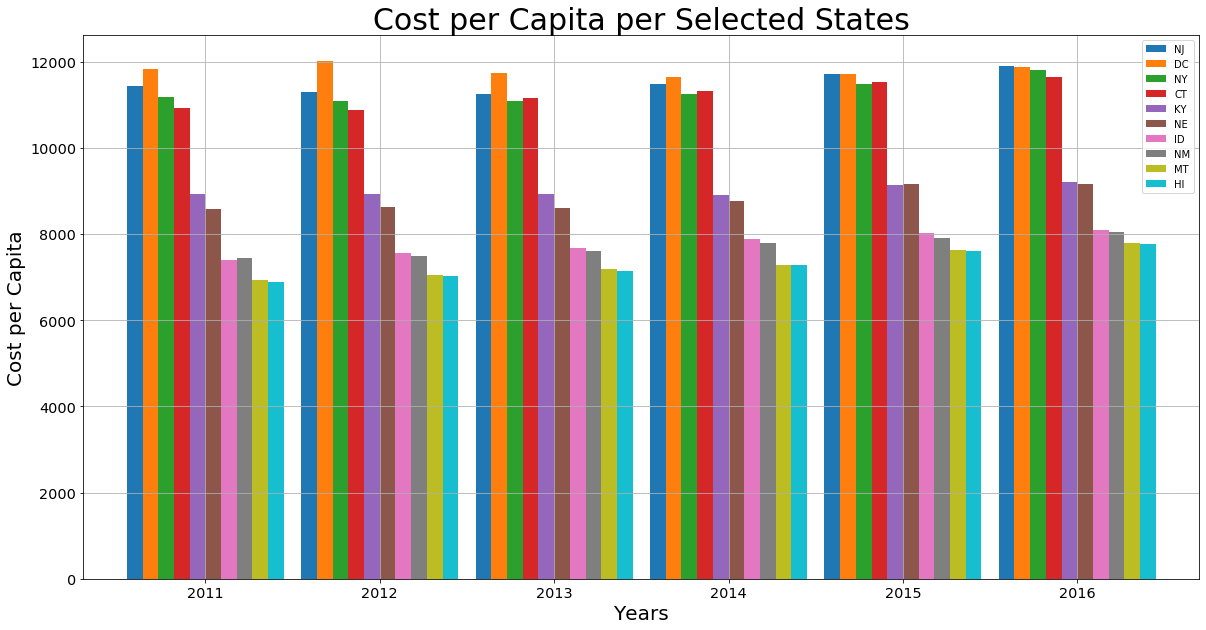

In [150]:
range_cpc.plot(kind='bar',figsize = (20,10), width = .9, grid = True, rot = 0)
plt.title('Cost per Capita per Selected States', fontdict = {'fontsize' : 30})
plt.xlabel('Years', fontdict = {'fontsize' : 20})
plt.ylabel('Cost per Capita', fontdict = {'fontsize' : 20})
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.savefig('../Images/cost_per_capita_bar_2011')